# Statistical Data Analysis Project

## Project description
The Megaline company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
We are carrying out a preliminary analysis of the plans based on a relatively small selection of clients. We need to analyze their behavior and determine which prepaid plan brings in more revenue. 

## Opening and investigating the data

In [1]:
#making sure I and the reviewer have the same versions
#!pip install -U matplotlib
#!pip install -U numpy
#!pip install -U pandas
#!pip install -U scipy

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import stats as st
try:
    # If we are online on the Jupyter Hub, we open the online database
    calls_data=pd.read_csv("/datasets/megaline_calls.csv")
    internet_data=pd.read_csv("/datasets/megaline_internet.csv")
    messages_data=pd.read_csv("/datasets/megaline_messages.csv")
    plans_data=pd.read_csv("/datasets/megaline_plans.csv")
    users_data=pd.read_csv("/datasets/megaline_users1.csv")
except:
    # If we are locally we open the local database
    calls_data=pd.read_csv("datasets/megaline_calls.csv")
    internet_data=pd.read_csv("datasets/megaline_internet.csv")
    messages_data=pd.read_csv("datasets/megaline_messages.csv")
    plans_data=pd.read_csv("datasets/megaline_plans.csv")
    users_data=pd.read_csv("datasets/megaline_users1.csv")

In [4]:
def investigate_data(data):
    print(' ==================== Table ==========================')
    display(data.head())
    print(' -------------------- Info ---------------------------')
    print(data.info())
    print('The shape is:', data.shape)
    print(' -------------- Data description ----------------------')
    display(data.describe().T)
    print('Number of duplicated rows :', data.duplicated().sum())

### Plans table

In [5]:
investigate_data(plans_data)

 ==================== Table ==========================


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


 -------------------- Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
The shape is: (2, 8)
 -------------- Data description ----------------------


,count,mean,std,min,25%,50%,75%,max
messages_included,2.0,525.00,671.751442,50.00,287.500,525.00,762.500,1000.00
mb_per_month_included,2.0,23040.00,10861.160159,15360.00,19200.000,23040.00,26880.000,30720.00
minutes_included,2.0,1750.00,1767.766953,500.00,1125.000,1750.00,2375.000,3000.00
usd_monthly_pay,2.0,45.00,35.355339,20.00,32.500,45.00,57.500,70.00
usd_per_gb,2.0,8.50,2.121320,7.00,7.750,8.50,9.250,10.00
usd_per_message,2.0,0.02,0.014142,0.01,0.015,0.02,0.025,0.03
usd_per_minute,2.0,0.02,0.014142,0.01,0.015,0.02,0.025,0.03


Number of duplicated rows : 0


#### Conclusion

Clear cut table containing the data of the two plans we are analyzing.

### Calls table

In [6]:
investigate_data(calls_data)

 ==================== Table ==========================


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


 -------------------- Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
The shape is: (137735, 4)
 -------------- Data description ----------------------


,count,mean,std,min,25%,50%,75%,max
user_id,137735.0,1247.658046,139.416268,1000.0,1128.00,1247.00,1365.00,1499.0
duration,137735.0,6.745927,5.839241,0.0,1.29,5.98,10.69,37.6


Number of duplicated rows : 0


#### Conclusion

The calls data seems fine.  There are no null-values.
We notice that the id is composed of the user_id and the id of the call. I think it will be more useful for the id to be the id of the message itself and change the column to int.
It seems there are some calls with duration 0, let's check them out.

In [7]:
zeroValues=len(calls_data[calls_data['duration']==0])
print('We have',zeroValues,'instances of calls with duration 0, which is {:.2%} of total'
      .format(zeroValues/len(calls_data)))

We have 26834 instances of calls with duration 0, which is 19.48% of total


That's a lot. Maybe they are missed calls? People don't answer the phone anymore? Maybe there is no reception? I don't think we should drop these rows, it will delete too much data.

### Internet Usage table

In [8]:
investigate_data(internet_data)

 ==================== Table ==========================


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


 -------------------- Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None
The shape is: (104825, 4)
 -------------- Data description ----------------------


,count,mean,std,min,25%,50%,75%,max
user_id,104825.0,1242.496361,142.053913,1000.0,1122.00,1236.00,1367.00,1499.00
mb_used,104825.0,366.713701,277.170542,0.0,136.08,343.98,554.61,1693.47


Number of duplicated rows : 0


In [9]:
internet_data['session_date'].describe()

count         104825
unique           351
top       2018-12-24
freq             851
Name: session_date, dtype: object

#### Conclusion

Another straight forward table, with no null values. We notice that we have only 351 dates in the database. We have some sessions with 0 mb used, we will have to check them out.

In [10]:
zeroValues=len(internet_data[internet_data['mb_used']==0])
print('We have',zeroValues,'instances of 0 megabytes used, which is {:.2%} of total'
      .format(zeroValues/len(internet_data)))

We have 13747 instances of 0 megabytes used, which is 13.11% of total


That's quite a lot. Maybe the user attempted to connect to the internet and there was no reception? I don't think we should drop these rows, it will delete too much data.

### Messages Table

In [11]:
investigate_data(messages_data)

 ==================== Table ==========================


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


 -------------------- Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
The shape is: (76051, 3)
 -------------- Data description ----------------------


,count,mean,std,min,25%,50%,75%,max
user_id,76051.0,1245.972768,139.843635,1000.0,1123.0,1251.0,1362.0,1497.0


Number of duplicated rows : 0


In [12]:
messages_data['message_date'].describe()

count          76051
unique           351
top       2018-12-28
freq             702
Name: message_date, dtype: object

### Users table

In [13]:
investigate_data(users_data)

 ==================== Table ==========================


,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


 -------------------- Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
The shape is: (500, 8)
 -------------- Data description ----------------------


,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,45.486,16.972269,18.0,30.00,46.0,61.00,75.0


Number of duplicated rows : 0


In [14]:
print("We have",users_data.duplicated().sum(),"duplicate users.")

We have 0 duplicate users.


In [15]:
users_data[~users_data['churn_date'].isnull()].sample(5)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
466,1466,Alphonse,Harmon,56,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-01-26,surf,2018-09-17
191,1191,Zack,Waters,75,"St. Louis, MO-IL MSA",2018-01-21,ultimate,2018-11-30
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
416,1416,Deja,Moss,25,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-10-03,surf,2018-11-21
441,1441,Piedad,Myers,23,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-08,ultimate,2018-08-19


### Conclusion

We see no obvious flaws with the database. We thank the Megaline company for providing us quality data :)

We see that the data was taken over a period of 351 days in 2018. We will see later how the churn attribute affects the results

The id columns in *internet*, *message* and *calls* tables is a string composed of the id of the person and id of the message/call/etc. It might be that we will decide that it's better to drop the person id and turn it to int, but for now we will let it like this.

We need to change the date columns type from object to date

## Preparing the data

### Changing the the date columns type from object to date

In [16]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')

In [17]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [18]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Conclusion
Types were change succesful to *datetime64*

### Grouping the data based on user and month
We have daily data for our users, but in truth we are only interested in monthly data. Since all the data is from year 2018, we will aggregate all data based on user_id and month.

In [20]:
messages_data['month']=pd.DatetimeIndex(messages_data['message_date']).month
internet_data['month']=pd.DatetimeIndex(internet_data['session_date']).month
calls_data['month']=pd.DatetimeIndex(calls_data['call_date']).month

In [21]:
#these tables will be grouped by user and month
complete_messages_monthly_data=messages_data.groupby(['user_id','month'])['message_date'].\
                agg(month_messages='count').reset_index()
complete_calls_monthly_data=calls_data.groupby(['user_id','month'])['duration'].\
                agg(month_call_duration='sum',month_call_number='count').reset_index()
complete_internet_monthly_data=internet_data.groupby(['user_id','month'])['mb_used'].\
                agg(month_data_size='sum',month_data_connection='count').reset_index()

In [22]:
#these tables will be grouped by user and month and holds monthly averages
messages_monthly_data=messages_data.groupby(['user_id','month'])['message_date'].\
                agg(month_messages='count').groupby('user_id').agg('mean').reset_index()
calls_monthly_data=calls_data.groupby(['user_id','month'])['duration'].\
                agg(month_call_duration='sum',month_call_number='count').groupby('user_id').agg('mean','mean').reset_index()
internet_monthly_data=internet_data.groupby(['user_id','month'])['mb_used'].\
                agg(month_data_size='sum',month_data_connection='count').groupby('user_id').agg('mean','mean').reset_index()

In [23]:
messages_monthly_data.sample(5)

,user_id,month_messages
391,1483,8.571429
254,1315,28.000000
152,1189,33.500000
148,1184,37.000000
164,1201,6.714286


In [24]:
calls_monthly_data.sample(5)

,user_id,month_call_duration,month_call_number
302,1316,182.3525,28.5
120,1125,489.5100,65.0
368,1385,414.5070,61.0
227,1238,442.4550,64.0
316,1331,337.4140,47.0


### Updating user data

We need to compute for each user the folowing data:
    - The number of calls made and minutes used per month
    - The number of text messages sent per month
    - The volume of data per month
All these datas will be added as columns for each user.

In the end we calculate the monthly revenue from each user according to the formula:
<br>
$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ monthly\  pay + \\
\ \ \ \ (messages_{monthly}-messages_{included}) * per\ message + \\
(megabytes_{monthly}-megabytes_{included}) * per\ megabyte + \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ \ \ \ \ \ \ \  \ \ (calls_{monthly}-calls_{included}) * per\ call \\
$    

In [25]:
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [26]:
from functools import reduce

In [27]:
def merge_data_plan(service1,service2,service3):
    #we use the reduce function to merge the table in an elegant way
    our_data = [service1, service2,service3]
    df_merged = reduce(lambda left,right: pd.merge(left,right,on=['user_id'],
                                            how='outer'), our_data)
    return pd.merge(users_data,df_merged,on='user_id')

In [28]:
full_users_data=merge_data_plan(internet_monthly_data,calls_monthly_data,messages_monthly_data)

In [29]:
def complete_merge_data_plan(service1,service2,service3):
    #we use the reduce function to merge the table in an elegant way
    our_data = [service1, service2,service3]
    df_merged = reduce(lambda left,right: pd.merge(left,right,on=['user_id','month'],
                                            how='outer'), our_data)
    return pd.merge(users_data,df_merged,on='user_id')

In [30]:
complete_users_data=complete_merge_data_plan(complete_internet_monthly_data,complete_calls_monthly_data,complete_messages_monthly_data)

In [31]:
complete_users_data

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,month_data_size,month_data_connection,month_call_duration,month_call_number,month_messages
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12,1901.47,5.0,116.83,16.0,11.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,6919.15,25.0,171.14,27.0,30.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,9,13314.82,53.0,297.69,49.0,44.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,10,22330.49,56.0,374.11,65.0,53.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,11,18504.30,51.0,404.59,64.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,12,23137.69,65.0,324.77,39.0,NaN
2289,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,9,12984.76,45.0,330.37,41.0,NaN
2290,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,10,19492.43,61.0,363.28,53.0,NaN
2291,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,11,16813.83,49.0,288.56,45.0,NaN


In [32]:
full_users_data.user_id.nunique()

490

In [33]:
calls_monthly_data.sample(5)

,user_id,month_call_duration,month_call_number
461,1480,511.510000,70.0
199,1210,449.570000,67.0
324,1339,22.378750,3.0
82,1084,581.726667,85.0
401,1418,214.998000,32.0


In [34]:
full_users_data=full_users_data.fillna(0)

In [35]:
complete_users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   first_name             2293 non-null   object 
 2   last_name              2293 non-null   object 
 3   age                    2293 non-null   int64  
 4   city                   2293 non-null   object 
 5   reg_date               2293 non-null   object 
 6   tariff                 2293 non-null   object 
 7   churn_date             158 non-null    object 
 8   month                  2293 non-null   int64  
 9   month_data_size        2277 non-null   float64
 10  month_data_connection  2277 non-null   float64
 11  month_call_duration    2258 non-null   float64
 12  month_call_number      2258 non-null   float64
 13  month_messages         1806 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 268.7+ 

In [36]:
complete_users_data.fillna(0,inplace=True)

We create a function to compute the total monthly payments

In [37]:
def payments(row):
    plan = plans_data[plans_data['plan_name']==row['tariff']]
    result = plan.usd_monthly_pay.values[0]
    #The user only pays for messages/data/calls only if they exceed his plan
    if (row.month_data_size>plan.mb_per_month_included.values[0]):
        result+=plan.usd_per_gb.values[0]*(1+(row.month_data_size-plan.mb_per_month_included.values[0])/1024)
              #The user pays for a full GB even if less than a GB was used. Instead of importing math and using ceil we simply add 1.
    if (row.month_call_duration>plan.minutes_included.values[0]):
        result+=plan.usd_per_minute.values[0]*math.ceil(row.month_call_duration-plan.minutes_included.values[0])
    if (row.month_messages>plan.messages_included.values[0]):
        result+=plan.usd_per_message.values[0]*(row.month_messages-plan.messages_included.values[0])
    return result

We apply the function we made to create the column of average monthly payment for each user

In [38]:
full_users_data['avg_monthly_payment']=full_users_data.apply(payments,axis=1)
full_users_data.sample(5)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month_data_size,month_data_connection,month_call_duration,month_call_number,month_messages,avg_monthly_payment
428,1436,Jennine,Kinney,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-08-26,ultimate,0,14389.730000,42.2,426.7240,60.200000,0.00,70.000000
117,1118,Deane,Ramirez,28,"Columbus, OH MSA",2018-12-08,surf,0,15963.980000,29.0,862.7800,115.000000,17.00,46.788242
314,1321,Karlyn,Jimenez,19,"North Port-Sarasota-Bradenton, FL MSA",2018-05-31,surf,0,19621.930000,59.0,474.9100,68.714286,0.00,71.620410
383,1391,Errol,Cooke,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-11,ultimate,0,15260.442500,48.5,498.7025,68.500000,30.25,70.000000
219,1222,Cleo,Anderson,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-27,surf,0,18535.863333,52.0,504.3600,71.000000,18.00,61.164290


In [39]:
complete_users_data['monthly_payment']=complete_users_data.apply(payments,axis=1)
complete_users_data.head(5)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month,month_data_size,month_data_connection,month_call_duration,month_call_number,month_messages,monthly_payment
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,0,12,1901.47,5.0,116.83,16.0,11.0,70.000000
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,8,6919.15,25.0,171.14,27.0,30.0,20.000000
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,9,13314.82,53.0,297.69,49.0,44.0,20.000000
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,10,22330.49,56.0,374.11,65.0,53.0,98.161191
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,0,11,18504.30,51.0,404.59,64.0,36.0,60.706055


### Conclusion
Now we know for each user what is his average payment to our company. We can now begin to analyze it.

## Analyzing customer behaviour

### Mean, Dispersion and Standard Deviation

We create a new DataFrame named customer behaviour  which will hold the mean, dispersion and standard deviation of the mean, messages and data of all users and respectively only of users that are not churned (safe users). We can use it to make understand why do users drop out of our plans.

In [40]:
customer_behaviour=pd.DataFrame(index=['safe_minutes','safe_messages','safe_data','surf_minutes','surf_messages','surf_data','ultimate_minutes','ultimate_messages','ultimate_data','churn_minutes','churn_messages','churn_data'],columns=['mean','variance','sigma'])

In [41]:
customer_behaviour.loc['surf_minutes','mean']=full_users_data.query('tariff=="surf"').month_call_duration.mean()
customer_behaviour.loc['surf_messages','mean']=full_users_data.query('tariff=="surf"').month_messages.mean()
customer_behaviour.loc['surf_data','mean']=full_users_data.query('tariff=="surf"').month_data_size.mean()

In [42]:
customer_behaviour.loc['surf_minutes','variance']=full_users_data.query('tariff=="surf"').month_call_duration.var()
customer_behaviour.loc['surf_messages','variance']=full_users_data.query('tariff=="surf"').month_messages.var()
customer_behaviour.loc['surf_data','variance']=full_users_data.query('tariff=="surf"').month_data_size.var()

In [43]:
customer_behaviour.loc['surf_minutes','sigma']=np.sqrt(customer_behaviour.loc['surf_minutes','variance'])
customer_behaviour.loc['surf_messages','sigma']=np.sqrt(customer_behaviour.loc['surf_messages','variance'])
customer_behaviour.loc['surf_data','sigma']=np.sqrt(customer_behaviour.loc['surf_data','variance'])

In [44]:
customer_behaviour.loc['ultimate_minutes','mean']=full_users_data.query('tariff=="ultimate"').month_call_duration.mean()
customer_behaviour.loc['ultimate_messages','mean']=full_users_data.query('tariff=="ultimate"').month_messages.mean()
customer_behaviour.loc['ultimate_data','mean']=full_users_data.query('tariff=="ultimate"').month_data_size.mean()

In [45]:
customer_behaviour.loc['ultimate_minutes','variance']=full_users_data.query('tariff=="ultimate"').month_call_duration.var()
customer_behaviour.loc['ultimate_messages','variance']=full_users_data.query('tariff=="ultimate"').month_messages.var()
customer_behaviour.loc['ultimate_data','variance']=full_users_data.query('tariff=="ultimate"').month_data_size.var()

In [46]:
customer_behaviour.loc['ultimate_minutes','sigma']=np.sqrt(customer_behaviour.loc['ultimate_minutes','variance'])
customer_behaviour.loc['ultimate_messages','sigma']=np.sqrt(customer_behaviour.loc['ultimate_messages','variance'])
customer_behaviour.loc['ultimate_data','sigma']=np.sqrt(customer_behaviour.loc['ultimate_data','variance'])

In [47]:
customer_behaviour.loc['churn_minutes','mean']=full_users_data.query('churn_date!=0').month_call_duration.mean()
customer_behaviour.loc['churn_messages','mean']=full_users_data.query('churn_date!=0').month_messages.mean()
customer_behaviour.loc['churn_data','mean']=full_users_data.query('churn_date!=0').month_data_size.mean()

In [48]:
customer_behaviour.loc['churn_minutes','sigma']=np.sqrt(customer_behaviour.loc['churn_minutes','variance'])
customer_behaviour.loc['churn_messages','sigma']=np.sqrt(customer_behaviour.loc['churn_messages','variance'])
customer_behaviour.loc['churn_data','sigma']=np.sqrt(customer_behaviour.loc['churn_data','variance'])

In [49]:
customer_behaviour.loc['churn_minutes','variance']=full_users_data.query('churn_date!=0').month_call_duration.var()
customer_behaviour.loc['churn_messages','variance']=full_users_data.query('churn_date!=0').month_messages.var()
customer_behaviour.loc['churn_data','variance']=full_users_data.query('churn_date!=0').month_data_size.var()

In [50]:
customer_behaviour.loc['safe_minutes','variance']=full_users_data.query('churn_date==0').month_call_duration.var()
customer_behaviour.loc['safe_messages','variance']=full_users_data.query('churn_date==0').month_messages.var()
customer_behaviour.loc['safe_data','variance']=full_users_data.query('churn_date==0').month_data_size.var()

In [51]:
customer_behaviour.loc['safe_minutes','mean']=full_users_data.query('churn_date==0').month_call_duration.mean()
customer_behaviour.loc['safe_messages','mean']=full_users_data.query('churn_date==0').month_messages.mean()
customer_behaviour.loc['safe_data','mean']=full_users_data.query('churn_date==0').month_data_size.mean()

In [52]:
customer_behaviour.loc['safe_minutes','sigma']=np.sqrt(customer_behaviour.loc['safe_minutes','variance'])
customer_behaviour.loc['safe_messages','sigma']=np.sqrt(customer_behaviour.loc['safe_messages','variance'])
customer_behaviour.loc['safe_data','sigma']=np.sqrt(customer_behaviour.loc['safe_data','variance'])

In [53]:
customer_behaviour

,mean,variance,sigma
safe_minutes,387.279897,36220.891142,190.317869
safe_messages,34.619993,1017.531239,31.898765
safe_data,15992.497779,38115125.16234,6173.744825
surf_minutes,386.028867,35490.395928,188.388949
surf_messages,32.543539,962.940689,31.031286
surf_data,15913.792689,38392011.539508,6196.128754
ultimate_minutes,386.324576,35542.942094,188.528359
ultimate_messages,38.511589,1081.472295,32.885746
ultimate_data,16064.432588,34609278.668199,5882.965126
churn_minutes,369.574322,24683.742599,NaN


### Histograms and Bar charts

Since the code for creating the histograms is repetitive, we will create a function that draws the histograms and puts labels on it according to the parameters we feed it.

In [54]:
def histo_plan(column,xlab,ylab,title,line_column,line1lab,line2lab):
    plt.figure(figsize=(16,6))
    plt.hist(full_users_data.query('tariff=="surf"')[column], bins=20, alpha=0.5, label="Surf users")
    plt.hist(full_users_data.query('tariff=="ultimate"')[column], bins=20, alpha=0.5, label="Ultimate users");
    plt.xlabel(xlab, size=14)
    plt.ylabel(ylab, size=14)
    plt.title(title, size=18)
    call_mean=customer_behaviour.loc['safe_minutes','mean']
    plt.vlines(x=plans_data[plans_data['plan_name']=='surf'][line_column], ymin=0, ymax=60, alpha=1, colors='blue', label = line1lab);
    plt.vlines(x=plans_data[plans_data['plan_name']=='ultimate'][line_column], ymin=0, ymax=60, alpha=1, colors='brown', label = line2lab);
    plt.legend(loc='upper right',);

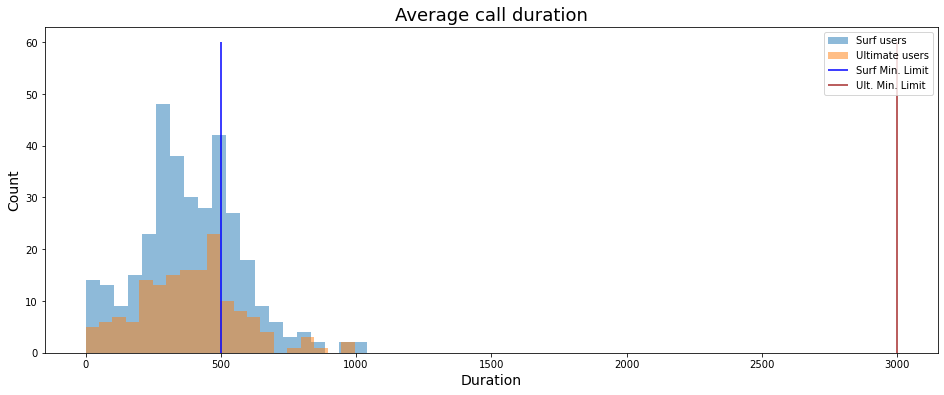

In [55]:
histo_plan('month_call_duration',"Duration","Count","Average call duration",'minutes_included','Surf Min. Limit','Ult. Min. Limit')

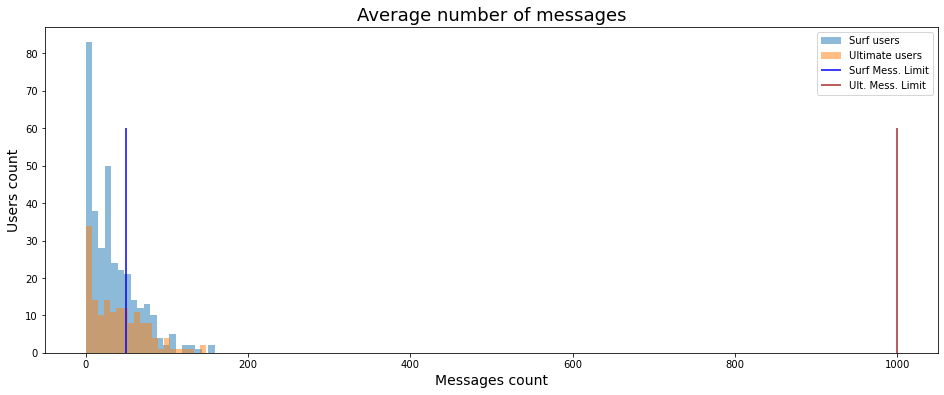

In [56]:
histo_plan('month_messages',"Messages count","Users count","Average number of messages",
           'messages_included','Surf Mess. Limit','Ult. Mess. Limit')

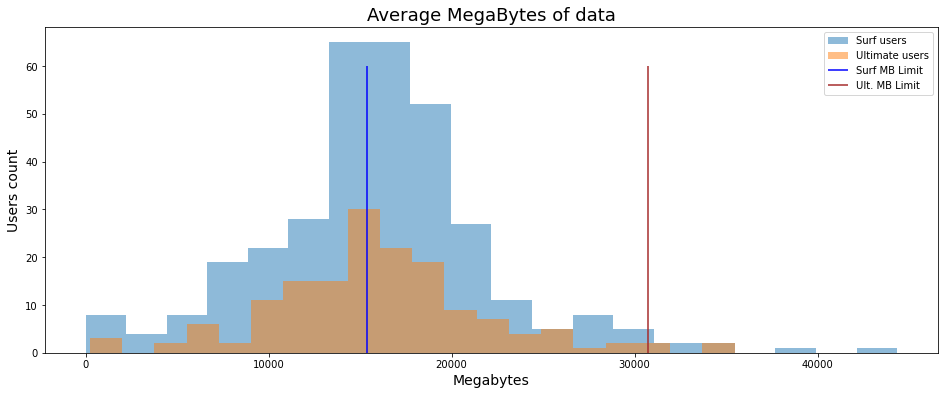

In [57]:
histo_plan('month_data_size',"Megabytes","Users count","Average MegaBytes of data",
           'mb_per_month_included','Surf MB Limit','Ult. MB Limit')

How many users pay more than the price for the phone plan?

In [58]:
total_surf_users=len(full_users_data.query('tariff=="surf"'))
total_ultimate_users=len(full_users_data.query('tariff=="ultimate"'))
paying_surf_users=len(full_users_data.query('tariff=="surf" & avg_monthly_payment>20'))
paying_ultimate_users=len(full_users_data.query('tariff=="ultimate" & avg_monthly_payment>70'))
print('There are {} surf users overpaying which represents {:.2%} of the total surf users'.
      format(paying_surf_users,paying_surf_users/total_surf_users))
print('There are {} ultimate users overpaying which represents {:.2%} of the total ultimate users'.
      format(paying_ultimate_users,paying_ultimate_users/total_ultimate_users))

There are 232 surf users overpaying which represents 69.67% of the total surf users
There are 3 ultimate users overpaying which represents 1.91% of the total ultimate users


What plan brings more money?

In [59]:
surf_income=full_users_data.query('tariff=="surf"')['avg_monthly_payment'].sum()
ultimate_income=full_users_data.query('tariff=="ultimate"')['avg_monthly_payment'].sum()
print('Total monthly income from surf users is {:.2f} which is {:.2f} per user, or {:.2%} of the total income'.
      format(surf_income,surf_income/total_surf_users,surf_income/(surf_income+ultimate_income)))
print('Total monthly income from ultimate users is {:.2f} which is {:.2f} per user, or {:.2%} of the total income'.
      format(ultimate_income,ultimate_income/total_ultimate_users,ultimate_income/(surf_income+ultimate_income)))

Total monthly income from surf users is 17023.28 which is 51.12 per user, or 60.57% of the total income
Total monthly income from ultimate users is 11080.83 which is 70.58 per user, or 39.43% of the total income


In [60]:
customer_behaviour

,mean,variance,sigma
safe_minutes,387.279897,36220.891142,190.317869
safe_messages,34.619993,1017.531239,31.898765
safe_data,15992.497779,38115125.16234,6173.744825
surf_minutes,386.028867,35490.395928,188.388949
surf_messages,32.543539,962.940689,31.031286
surf_data,15913.792689,38392011.539508,6196.128754
ultimate_minutes,386.324576,35542.942094,188.528359
ultimate_messages,38.511589,1081.472295,32.885746
ultimate_data,16064.432588,34609278.668199,5882.965126
churn_minutes,369.574322,24683.742599,NaN


### Conclusions
We see from the *customer_behaviour* that the churned and regular users have very similar behaviour and histograms, with very similar means and variance. This proves us correct in not dropping the churned users.

We are very surprised to see that there doesn't seem to be a difference in usage between Surf users and Ultimate users! We will test thy hypotheses in the next chapter.

We see that surf users regularly go above their plan limits, while for ultimate users this is very rare (only 3 ultimate users went above their data limits). As such, most of the income comes from surf users.

## Testing Hypotheses

###    The average revenue from users of Ultimate and Surf calling plans differs

We make the following null hypothesis:
<br>
$ H_{0} = $ The average revenue from users of Ultimate and Surf calling plans are the same.
<br>
The alternative hypothesis is:
<br>
$ H_{1} = $ The average revenue from users of Ultimate and Surf calling plans are different.
<br>We choose the estimated standard error $\alpha = 0.05$ which should provide us with an adequate margin of confidence.


In [61]:
def hypotesis(alpha,data1,data2):
    results = st.ttest_ind(data1,data2, 
        equal_var = False)

    print('p-value: {:.18f}'.format(results.pvalue))
    # if the p-value is less than alpha, we reject the hypothesis
    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis") 

In [62]:
hypotesis(0.05,complete_users_data.query('tariff=="surf"')['monthly_payment'], 
    complete_users_data.query('tariff=="ultimate"')['monthly_payment'])

p-value: 0.000000000406140183
We reject the null hypothesis


###  The average revenue from users in NY-NJ area is different from that of the users from other regions

In [63]:
full_users_data[full_users_data['city'].str.contains('NY|NJ')].sample(5)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,month_data_size,month_data_connection,month_call_duration,month_call_number,month_messages,avg_monthly_payment
126,1127,Marchelle,Brock,28,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,0,21702.718571,67.00,201.011429,28.428571,10.857143,91.940611
67,1068,Marcel,Jimenez,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,0,14174.190000,45.75,214.575000,31.000000,0.000000,20.000000
368,1375,Andy,Holden,69,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-01,surf,0,13623.690000,48.00,259.300000,36.000000,81.000000,20.930000
166,1169,Hai,Bean,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-06,surf,0,17431.280000,39.00,789.820000,105.000000,110.000000,60.727344
337,1344,Hugo,Daugherty,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-25,surf,0,4054.010000,17.00,39.140000,6.000000,14.000000,20.000000


We make the following null hypothesis:
<br>
$ H_{0} = $ The average revenue from NY-NJ area users is the same with that of the users from other regions
<br>
The alternative hypothesis is:
<br>
$ H_{1} = $ The average revenue from  NY-NJ area users is <b>not</b> the same with that of the users from other regions
<br>
We choose the same estimated standard error $\alpha = 0.05$ which should provide us with an adequate margin of confidence.


In [64]:
ny_nj_users_data=complete_users_data[complete_users_data['city'].str.contains('NY|NJ')]['monthly_payment']
rest_of_us_users_data=complete_users_data[~complete_users_data['city'].str.contains('NY|NJ')]['monthly_payment']
hypotesis(0.05,ny_nj_users_data,rest_of_us_users_data)

p-value: 0.166637420046862356
We can't reject the null hypothesis


#### Conclusion
We tested the hypoteses that average revenue from users of Ultimate and Surf calling plans are the same and that the average revenue from users from New York and New Jersey are similar to that of the other american states.
We saw that the first hypothesis was rejected and average revenue is different between the two plans.
The second hypothesis we couldn't reject, so it seems that the revenue from NY-NJ users is similar to the rest of USA.

## Overall Conclusion
We have opened and explored the each table. 
We had no missing values but quite a lot of dropped calls and internet conections. We decided not to remove them so we don't lose all that related data.
We grouped the data based on user and month and calculated for each user his average monthly usage and cost.
We plotted histograms for calls duration, data transfers and messages, with comparison between the users on the surf plan and those on the ultimate plan.
We were surprised to find out that even though in the hystogram it seems that the usage pattern between clients of the two phone plans seems very similar, the statistical analysis show that there is a significant difference in the average revenue between them. In the same time, there is no revenue difference between users from New York and New Jersey and the rest of the country. <br>
Most of the revenue comes from users on the 'surf' phone plan, who go above their plan limits.